In [1]:
import pulp
import operator
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.approximation import min_weighted_vertex_cover

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
with open('data/neighbor_cities_in_Turkey.txt', 'r') as f:
    lines = f.read().splitlines() 

In [4]:
G = nx.from_dict_of_lists({line.split(',')[0]: line.split(',')[1:] for line in lines})

In [5]:
n = len(set(G.nodes))
n

81

In [6]:
G.nodes

NodeView(('Adana', 'Adiyaman', 'Afyon', 'Agri', 'Amasya', 'Ankara', 'Antalya', 'Artvin', 'Aydin', 'Balikesir', 'Bilecik', 'Bingol', 'Bitlis', 'Bolu', 'Burdur', 'Bursa', 'Canakkale', 'Cankiri', 'Corum', 'Denizli', 'Diyarbakir', 'Edirne', 'Elazig', 'Erzincan', 'Erzurum', 'Eskisehir', 'Gaziantep', 'Giresun', 'Gumushane', 'Hakkari', 'Hatay', 'Isparta', 'Mersin', 'Istanbul', 'Izmir', 'Kars', 'Kastamonu', 'Kayseri', 'Kirklareli', 'Kirsehir', 'Kocaeli', 'Konya', 'Kutahya', 'Malatya', 'Manisa', 'Kahramanmaras', 'Mardin', 'Mugla', 'Mus', 'Nevsehir', 'Nigde', 'Ordu', 'Rize', 'Sakarya', 'Samsun', 'Siirt', 'Sinop', 'Sivas', 'Tekirdag', 'Tokat', 'Trabzon', 'Tunceli', 'Sanliurfa', 'Usak', 'Van', 'Yozgat', 'Zonguldak', 'Aksaray', 'Bayburt', 'Karaman', 'Kirikkale', 'Batman', 'Sirnak', 'Bartin', 'Ardahan', 'Igdir', 'Yalova', 'Karabuk', 'Kilis', 'Osmaniye', 'Duzce'))

In [7]:
#source: "https://simplemaps.com/data/tr-cities"
coordinates_and_population = pd.read_csv("data/coordinates.csv")[["city", "lng", "lat", 'population']]

In [8]:
coordinates_and_population.city = (coordinates_and_population.city
                                   .str.replace('ş','s')
                                   .str.replace('ğ','g')
                                   .str.replace('ı','i')
                                   .str.replace('ç','c')
                                   .str.replace('ü','u')
                                   .str.replace('Ş','S')
                                   .str.replace('ö','o')
                                   .str.replace('Ç','C')
                                   .str.replace('Ü','U')
                                   .str.replace('İ','I')
                                   .str.replace('Ö','O')
                                   .str.replace('Afyonkarahisar','Afyon'))

In [9]:
coordinates_and_population = coordinates_and_population.set_index('city')
coordinates_and_population = coordinates_and_population.loc[~coordinates_and_population.index.duplicated(keep='first')]
coordinates_and_population = coordinates_and_population.reindex(G.nodes)

In [10]:
len(coordinates_and_population)

81

In [11]:
pos = coordinates_and_population[["lng", "lat"]].T.to_dict(orient='list')

In [12]:
#biggest_30_cities = coordinates_and_population.population.sort_values(ascending=False).head(30).index

In [13]:
#source: https://www.haberturk.com/giris-cikis-yasaklanan-iller-hangisidir-30-buyuksehir-listesi-2020-2635405
restricted_cities = ["Adana", "Ankara", "Antalya", "Aydın", "Balıkesir", "Bursa", "Denizli", "Diyarbakır", 
 "Erzurum", "Eskişehir", "Gaziantep", "Hatay", "İstanbul", "İzmir", "Kahramanmaraş", 
 "Kayseri", "Kocaeli", "Konya", "Malatya", "Manisa", "Mardin", "Mersin", "Muğla", 
 "Ordu", "Sakarya", "Samsun", "Şanlıurfa", "Tekirdağ", "Trabzon", "Van", "Zonguldak"]

In [14]:
restricted_cities = (pd.Series(restricted_cities)
 .str.replace('ş','s')
 .str.replace('ğ','g')
 .str.replace('ı','i')
 .str.replace('ç','c')
 .str.replace('ü','u')
 .str.replace('Ş','S')
 .str.replace('ö','o')
 .str.replace('Ç','C')
 .str.replace('Ü','U')
 .str.replace('İ','I')
 .str.replace('Ö','O')
 .str.replace('Afyonkarahisar','Afyon')).values

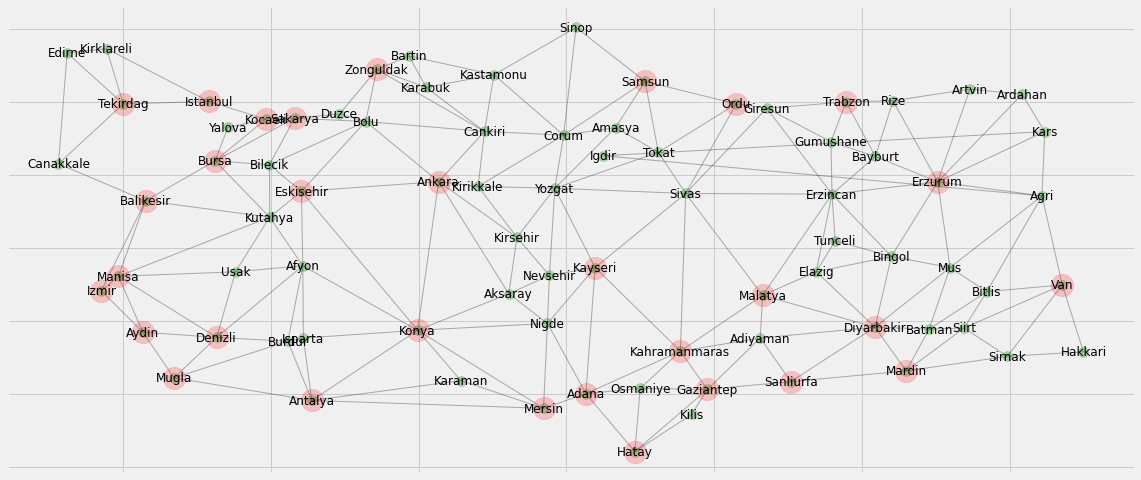

In [15]:
plt.figure(figsize=(18,8)) 
nodes = nx.draw_networkx_nodes(G, pos=pos, alpha=0.3, node_size=100, node_color='green')
big_cities = nx.draw_networkx_nodes(G, nodelist=restricted_cities, pos=pos, alpha=0.2, node_size=500, node_color='red')
labels = nx.draw_networkx_labels(G, pos=pos)
edges = nx.draw_networkx_edges(G, pos=pos, alpha=0.3)

In [16]:
# 2-approx. algorithm for min. vertex cover
len(min_weighted_vertex_cover(G))

74

In [17]:
# maximum matching number is a lower bound for the min. vertex cover number
len(nx.max_weight_matching(G))

40

In [18]:
# n - denegeracy number of \bar(G) is another lower bound for min. vertex cover number of G
G_bar = nx.complement(G)
n - nx.core.core_number(G_bar)["Istanbul"]

10

In [66]:
# |V| = a minimal vertex cover + a maximal independent set
# networkx provides a maximal independent set algorithm
# the algorithm returns a different maximal independent set each time
# we call the algorithm several times and then select the biggest one
trials = []
for _ in range(100_000):
    independet_set = nx.algorithms.mis.maximal_independent_set(G)
    trials.append( (n - len(independet_set), independet_set) )
min(trials, key=operator.itemgetter(0))

(52,
 ['Hakkari',
  'Kirikkale',
  'Bilecik',
  'Malatya',
  'Izmir',
  'Kirklareli',
  'Karaman',
  'Bartin',
  'Siirt',
  'Gumushane',
  'Ardahan',
  'Osmaniye',
  'Amasya',
  'Igdir',
  'Tunceli',
  'Usak',
  'Mugla',
  'Mus',
  'Aksaray',
  'Rize',
  'Isparta',
  'Sanliurfa',
  'Kocaeli',
  'Ordu',
  'Kayseri',
  'Canakkale',
  'Kilis',
  'Duzce',
  'Sinop'])

In [21]:
vertex_cover = set(G.nodes).difference(min(trials, key=operator.itemgetter(0))[1])

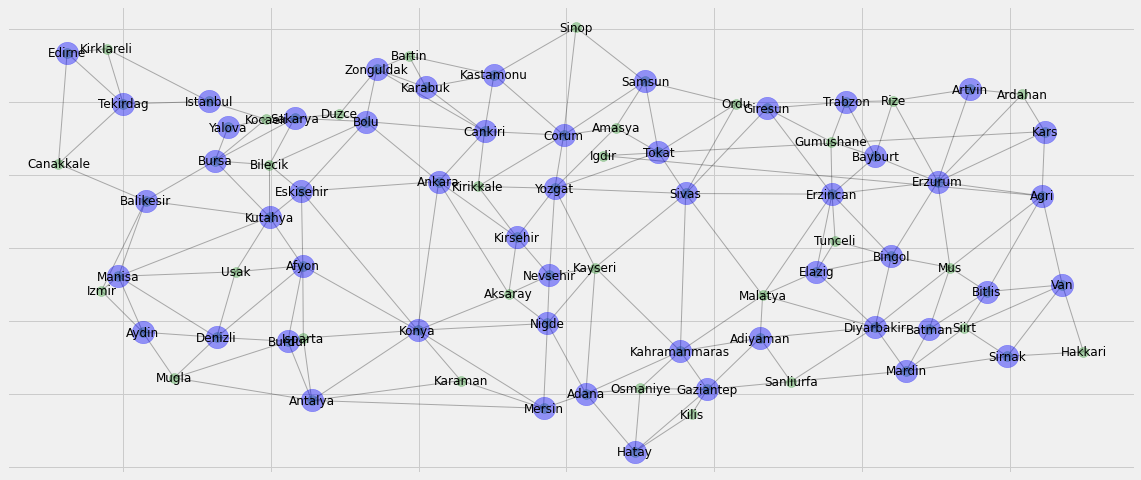

In [22]:
plt.figure(figsize=(18,8)) 
nodes = nx.draw_networkx_nodes(G, pos=pos, alpha=0.3, node_size=100, node_color='green')
vc = nx.draw_networkx_nodes(G, nodelist=vertex_cover, pos=pos, alpha=0.4, node_size=500, node_color='blue')
labels = nx.draw_networkx_labels(G, pos=pos)
edges = nx.draw_networkx_edges(G, pos=pos, alpha=0.3)

### Mathematical Programming Model

$\min \sum_{u \in V}(x_u) $

s.t.

$x_u + x_v \geq 1$, $\forall u,v \in E$

$x_u \in \{0,1\}$

In [55]:
vertexcover_model = pulp.LpProblem("The_Vertex_Cover_Problem", pulp.LpMinimize)
x = pulp.LpVariable.dict("x_%s", G.nodes, cat = pulp.LpBinary)

vertexcover_model += sum([x[u] for u in G.nodes]) # objective function 

for u,v in G.edges:
    vertexcover_model += x[u] + x[v] >= 1

In [56]:
vertexcover_model.solve()

1

In [59]:
# optimum value
sum([(x[u].value()) for u in G.nodes])

52.0

In [63]:
# the set of vertices in the optimum vertex cover
optimum_vc = [u for u in G.nodes if x[u].value() == 1]

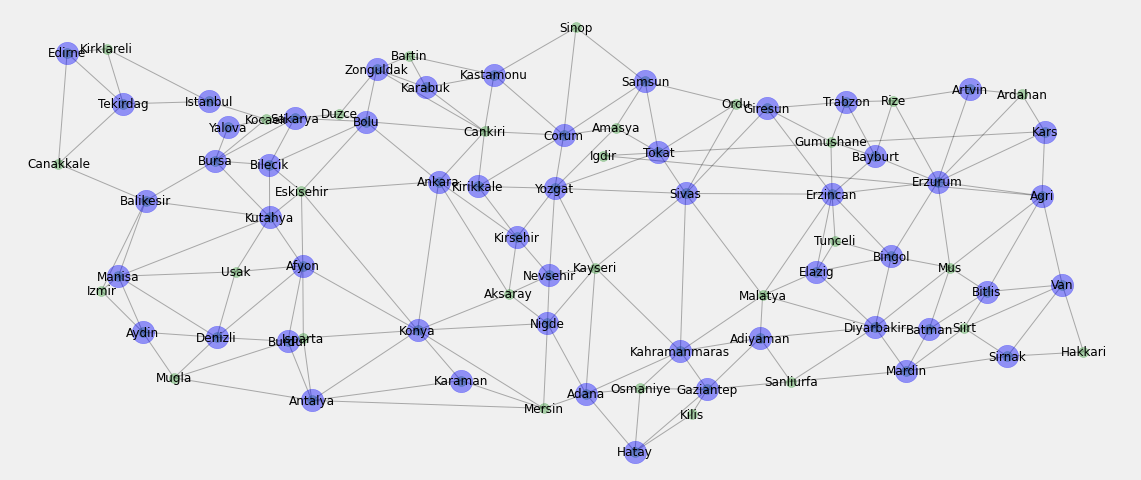

In [67]:
plt.figure(figsize=(18,8)) 
nodes = nx.draw_networkx_nodes(G, pos=pos, alpha=0.3, node_size=100, node_color='green')
vc = nx.draw_networkx_nodes(G, nodelist=optimum_vc, pos=pos, alpha=0.4, node_size=500, node_color='blue')
labels = nx.draw_networkx_labels(G, pos=pos)
edges = nx.draw_networkx_edges(G, pos=pos, alpha=0.3)
plt.grid(False)